<center> <h1> Laboratorijas darbs #3.2

<center> <h2> Motoru cilindra spiediena datu analīze

<center> <h2> Vidējais efektīvais spiediens, sūknēšanas un berzes zudumi, vidējā temperatūra cilindrā.

Šajā darbā turpinās iesāktā motora indicēto un efektīvo datu analīze. <br>
Sākumā jāveic vides sagatavošana, ielādējot bibliotēkas, kā arī jāielādā dati. <br>
Tāpat kā iepriekšējā darba daļā, koda sākumā var nomainīt $\lambda$ vērtību. (0.9; 1; 1.1)

<center> <h2> Datu ielāde un sagatavošana

In [2]:
import numpy as np
import scipy.io as spio # to import matlab
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)


# Initial parameters
#Choose air/fuel ratio Lambda according to data: 0.9, 1 or 1.1

Lambda = 1.1

Speed=1500 # rpm

if Lambda==0.9:
    Data = spio.loadmat('Data_L09.mat')
elif Lambda==1:
    Data = spio.loadmat('Data_L1.mat')
elif Lambda==1.1:
    Data = spio.loadmat('Data_L11.mat')
    
# Cylinder Pressure Data
P_Test1 = Data ['P_Mot'] # import variable from mat file
P_Test2 = Data ['P_SA20']
P_Test3 = Data ['P_SA25']
P_Test4 = Data ['P_SA30']

# Engine Torque Data
T_Test1 = Data ['T_Mot'] # import variable from mat file
T_Test2 = Data ['T_SA20']
T_Test3 = Data ['T_SA25']
T_Test4 = Data ['T_SA30']

P_Test1=np.squeeze(P_Test1) #removes axes with length 1
P_Test2=np.squeeze(P_Test2)
P_Test3=np.squeeze(P_Test3)
P_Test4=np.squeeze(P_Test4)

T_Test1=np.squeeze(T_Test1) #removes axes with length 1
T_Test2=np.squeeze(T_Test2)
T_Test3=np.squeeze(T_Test3)
T_Test4=np.squeeze(T_Test4)

In [3]:
SA_Test1=0 # Spark Advance, CAD BTDC
SA_Test2=20
SA_Test3=25
SA_Test4=30

#labels for plots

label_Test1='Motoring'
label_Test2='SA 20'
label_Test3='SA 25'
label_Test4='SA 30'

#labels for bar plot
labels_line_all = [label_Test1, label_Test2, label_Test3, label_Test4]
labels_line_fired = [label_Test2, label_Test3, label_Test4]
label_L=', $\lambda$ = '+str(Lambda) #converts to string
#First Figure:
Ff=1;

In [4]:
from fc_volume_4F import volume #call function to calculate volume
Vd, Vc, Vth, dVth, cad =volume ()

<center> <h3> Vidējais efektīvais spiediens (BMEP)

Patērētāji griezes momenta nosaukumu atpazīst un labprāt lieto, lai raksturotu motoru darbību. Inženieru vidū plašāk lieto parametru, kas ir proporcionāls griezes momentam, bet nav atkarīgs no motora tilpuma. Ar šo parametru jau esam pazīstami - tas ir vidējais efektīvais spiediens (Brake Mean Effective Pressure, BMEP). <br>
BMEP būtībā ir motora vienā ciklā paveiktā darba attiecība pret darba tilpumu. Tas raksturo motora darba tilpuma izmantošanu - jo augstāka BMEP vērtība, jo augstāka slodze vai vairāk forsēts motors. <br>
Šajā uzdevumā BMEP vajag aprēķināt vienam cilindram. To var veikt sekojoši: <br>
$$ BMEP=\frac {T_b \cdot 2\pi \cdot n\cdot 10^{-5}}{V_d} $$

 kur<br>
&emsp;&emsp;$BMEP$ - vidējais efektīvais spiediens, bar;<br>
&emsp;&emsp;$T_b$ - vidējais griezes moments ciklā, vienam cilindram, Nm;<br>
&emsp;&emsp;$n$ - kloķvāprstas apgriezieni ciklā (4 taktu motoram n=2)<br>
&emsp;&emsp;$V_d$ - cilindra darba tilpums, $m^3$.
<br>
Griezes moments ir mērīts visam motoram, tā vidējā vērtība ciklā jādala ar cilnidru skaitu.<br>

<br>
Aprēķinu veic, sastādot aprēķinu kodu. <br>

Ja aprēķins jāveic atkārtoti, ērtāk ir izveidot savu funkciju, un lietot atkāroti. <br>

Zemāk redzamajā koda fragmentā izveidota funkcija BMEP.


In [5]:
def BMEP (Tb):
    import numpy as np
    from fc_volume_4F import volume #call function to calculate volume
    Vd, Vc, Vth, dVth, cad =volume ()
    
    Tb_mean=np.mean(Tb)/4
    BMEP=(Tb_mean*2*np.pi*2*10**(-5))/Vd
    
    return BMEP 

BMEP_Test2 = BMEP (T_Test2)
BMEP_Test3 = BMEP (T_Test3)
BMEP_Test4 = BMEP (T_Test4)

Rezultātu var attēlot stabiņu diagrammas veidā:

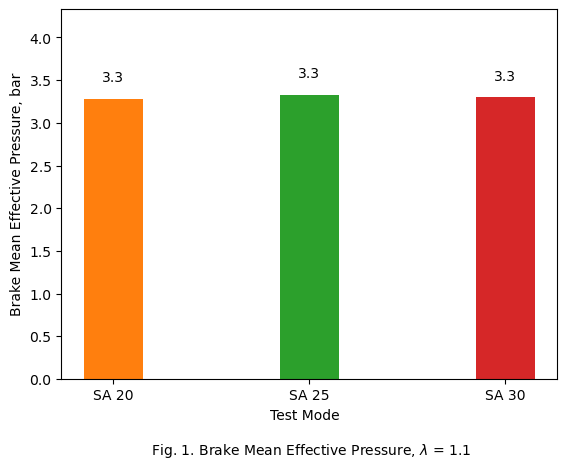

In [6]:
# Create bar plot for BMEP
BMEP = [BMEP_Test2 ,BMEP_Test3, BMEP_Test4]

x = np.arange(np.size(BMEP)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, BMEP,width=0.3, color=['C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (BMEP[index]+0.2), str(np.round(BMEP[index],1)),horizontalalignment='center')
    
ax.set_ylabel('Brake Mean Effective Pressure, bar')
F=str(Ff)
ax.set_xlabel('Test Mode  \n \n Fig. '+F+'. Brake Mean Effective Pressure'+label_L)
Ff=Ff+1


ylim=np.round((np.max(BMEP)+1),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_fired)
plt.show()

<center> <h3> Indicētais vidējais efektīvais spiediens

***
Vidējo efektīvo spiedienu var aprēķināt arī no cilnidra spiediena un tilpuma izmaiņu datiem. Tad to dēvē par *indicēto* vidējo spiedienu.

Indicētais vidējais  efektīvais spiediens (IMEP) raksturo motora darba tilpuma izmantošanu. Jo tā vērtība augstāka, jo motora darba tilpums vairāk un efektīvāk izmantots. IMEP var aprēķināt visam motora darba ciklam, un tad to dēvē par $IMEP_{net}$, vai arī tikai saspiedes un izpletes procesiem ($IMEP_{gross}$. Lai gan $IMEP_{net}$ aptver lielāku motora cikla daļu, tā vērtība vienmēr ir zemāka par $IMEP_{gross}$, jo netiek ietverts gāzu apmaiņai nepieciešamais darbs. <br>
IMEP var aprēķināt, dalot gāzu paveikto darbu ar motora darba tilpumu. Būtībā ir jāaprēķina laukums, ko iezīmē līkne spiediena/ tilpuma diagrammā. To var paveikt, veicot skaitlisku integrēšanu. Vispārīgais vienādojums ir sekojošs:

 $$IMEP=\frac {\oint p_\theta \cdot dV_\theta}{V_d}$$ <br>
 
 Integrējot iegūtais skaitliskais rezultāts atbilst laukumam starp līknēm spiediena/tilpuma diagrammā, kas parādīta 2. attēlā. <br>
 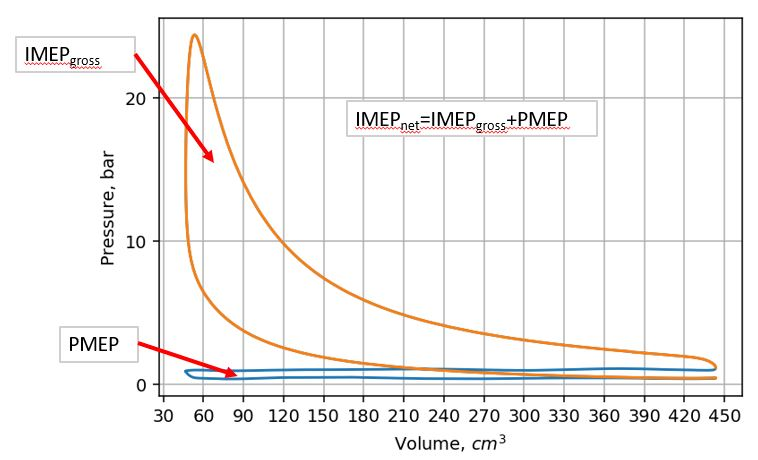<center> 
 <center> 2. att. Bruto indicātais vidējais efektīvais spiediens IMEP$_{gross}$ un sūknēšanas vidējais efektīvais spiediens (PMEP)   <br>
 
 
 Gross gadījumā skaitliski integrē spiediena un tilpuma diferenciāļa reizinājumu tikai saspiedes un izpletes procesos (apmēram - 180 ... + 540 CAD). Savukārt Net gadījumā izvēlas visu motora ciklu (720 CAD). <br>
 $IMEP_{gross}$ un $IMEP_{net}$ starpība ļauj novērtēt gāzu apmaiņas darbu jeb sūknēšanas radītos zudumus.


Izveido funkciju IMEP, kas aprēķina vidējo efektīvo spiedienu. Skaitliskajai integrēšanai šādā gadījumā piemērots ir trapeciodālais paņēmiens. <br>
Importē funkciju, un izsauc to 4 reizes:

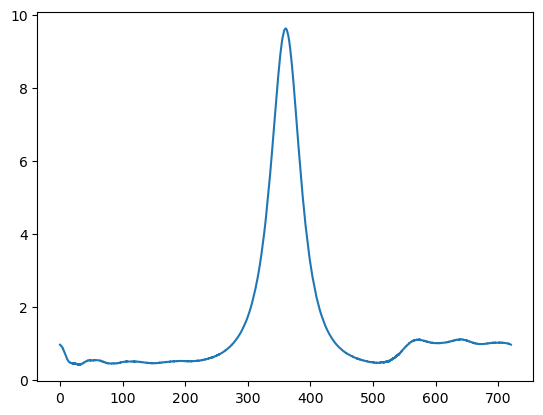

In [9]:
def imep (cyl_p, dVth, Vd): #define function

# indent obligatory
    
    import numpy as np
    PdV=cyl_p*dVth #aprekina spiediena un tilpumu izmainu reizinajumu
    PdV_gross=cyl_p[1799:5399]*dVth[1799:5399] # tikai saspiedes un izpletes procesaa

    IMEP=np.trapz(PdV)/Vd #skaitliski integree
    IMEP_gross=np.trapz(PdV_gross/Vd);
    
    

    
    return (IMEP, IMEP_gross) #returns results

IMEP_net_Test1, IMEP_gross_Test1 =imep (P_Test1, dVth, Vd)
IMEP_net_Test2, IMEP_gross_Test2 =imep (P_Test2, dVth, Vd)
IMEP_net_Test3, IMEP_gross_Test3 =imep (P_Test3, dVth, Vd)
IMEP_net_Test4, IMEP_gross_Test4 =imep (P_Test4, dVth, Vd)


Iegūtos rezultātus var attēlot grafiski:

In [ ]:

Ff=Ff+1

# Create bar plot for IMEP_net
IMEP = [IMEP_net_Test1, IMEP_net_Test2 ,IMEP_net_Test3, IMEP_net_Test4]
labels = ['Mot', 'SA 20', 'SA 25', 'SA 30']
x = np.arange(np.size(IMEP)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, IMEP,width=0.3,color=['C0','C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (IMEP[index]+0.2), str(np.round(IMEP[index],2)),horizontalalignment='center')
    
ax.set_ylabel('IMEP$_{net}$, bar')
F=str(Ff)
ax.set_xlabel('Test Mode  \n \n Fig. '+F+'. Indicated Mean Effective  Pressure, Net'+label_L)
Ff=Ff+1


ylim=np.round((np.max(IMEP)+1),2)
ax.set_ylim(-1, ylim)
plt.xticks(x, labels)
plt.show()

# Create bar plot for IMEP_gross
IMEP = [IMEP_gross_Test1, IMEP_gross_Test2 ,IMEP_gross_Test3, IMEP_gross_Test4]
labels = ['Mot', 'SA 20', 'SA 25', 'SA 30']
x = np.arange(np.size(IMEP)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, IMEP,width=0.3,color=['C0','C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (IMEP[index]+0.2), str(np.round(IMEP[index],2)),horizontalalignment='center')
    
ax.set_ylabel('IMEP$_{gross}$, bar')
F=str(Ff)
ax.set_xlabel('Test Mode  \n \n Fig. '+F+'. Indicated Mean Effective  Pressure, Gross'+label_L)
Ff=Ff+1

ylim=np.round((np.max(IMEP)+1),2)
ax.set_ylim(-1, ylim)
plt.xticks(x, labels)
plt.show()

Redzams, ka IMEP$_{gross}$ ir lielāks par IMEP$_{net}$. Atņemot tos vienu no otra, iegūstam sūknēšanas zudumu ekvivalentu - sūknēšanas vidējo efektīvo spiedienu jeb PMEP:<br> <br>
$$PMEP=IMEP_{gross}-IMEP_{net}$$ <br>



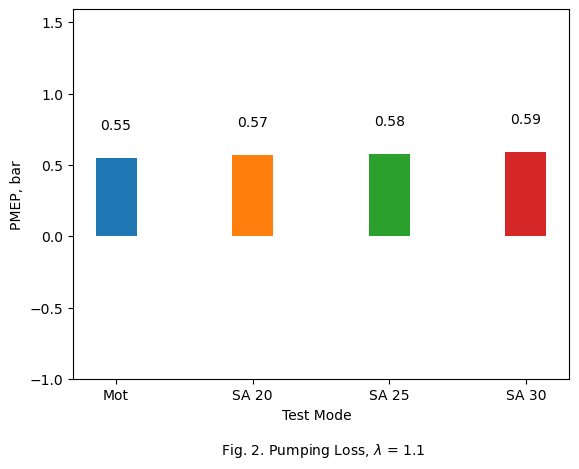

In [10]:
# Pumping loss

PMEP_Test1=IMEP_gross_Test1-IMEP_net_Test1
PMEP_Test2=IMEP_gross_Test2-IMEP_net_Test2
PMEP_Test3=IMEP_gross_Test3-IMEP_net_Test3
PMEP_Test4=IMEP_gross_Test4-IMEP_net_Test4

# Create bar plot for pumping loss
PMEP = [PMEP_Test1, PMEP_Test2 ,PMEP_Test3, PMEP_Test4]
labels = ['Mot', 'SA 20', 'SA 25', 'SA 30']
x = np.arange(np.size(PMEP)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, PMEP,width=0.3,color=['C0','C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (PMEP[index]+0.2), str(np.round(PMEP[index],2)),horizontalalignment='center')
    
ax.set_ylabel('PMEP, bar')
F=str(Ff)
ax.set_xlabel('Test Mode  \n \n Fig. '+F+'. Pumping Loss'+label_L)
Ff=Ff+1

ylim=np.round((np.max(PMEP)+1),2)
ax.set_ylim(-1, ylim)
plt.xticks(x, labels)
plt.show()

Nākošais parametrs, ko ir salīdzinoši viegli aprēķināt, ir kopējie ***berzes zudumi***. Tie ietver gan motora iekšējo detaļu berzi, gan aksesuāru radīto slodzi. Kā aksesuāri šeit domāti eļļas sūknis, dzesēšanas sķidruma sūknis, ģenerators, stūres pastiprinātāja sūknis un tamlīdzīgi. Pievienojot un atvienojot šo aksesuārus, varētu noteikt arī to radītos zudumus. <br>
berzes zudumus pieņemts izteikt kā *berzes vidējo efektīvo spiedienu* jeb FMEP. <br>
FMEP aprēķina, atņemot no gāzu paveiktā darba to darbu, ko veic kloķvārpsta. Lai nebūtu īpaši jāaprēķina šo darbu vērtības, ērti lietot vidējo efektīvo spiedienu:

<br> <br>

$$FMEP=IMEP_{gross}-BMEP$$ <br>


In [ ]:
# Friction loss


FMEP_Test2=IMEP_gross_Test2-BMEP_Test2
FMEP_Test3=IMEP_gross_Test3-BMEP_Test3
FMEP_Test4=IMEP_gross_Test4-BMEP_Test4

# Create bar plot for pumping loss
FMEP = [FMEP_Test2 ,FMEP_Test3, FMEP_Test4]
labels = [ 'SA 20', 'SA 25', 'SA 30']
x = np.arange(np.size(FMEP)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, FMEP,width=0.3,color=['C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (FMEP[index]+0.2), str(np.round(FMEP[index],2)),horizontalalignment='center')
    
ax.set_ylabel('FMEP, bar')
F=str(Ff)
ax.set_xlabel('Test Mode  \n \n Fig. '+F+'. Friction Loss'+label_L)
Ff=Ff+1

ylim=np.round((np.max(FMEP)+1),2)
ax.set_ylim(-1, ylim)
plt.xticks(x, labels)
plt.show()

<center> <h3> Vidējā gāzu temperatūra motora cilindrā

***

Gāzes temperatūras sadalījums motora cilindrā ir nevienmērgs, īpaši sadedzes procesa laikā. Ar vienkāršiem paņēmieniem, zinot vielas daudzumu, spiedienu un tilpumu, var aprēķināt vidējo gāzes temperatūru motora cilindrā un tās izmaiņas motora darba cikla daļā, kurā nenotiek gāzu apmaiņa caur vārstiem. <br>
Aprēķinu var sākt ar degmaisījuma blīvuma vērtības noskaidrošanu zināmos apstākļos, saspiedes sākumā: 

$$\rho_{degmaisījums}=\frac{p_1}{R_i \cdot T_1}$$
 kur<br>

&emsp;&emsp;$\rho_{gaiss}$ - blīvums, $ kg/m^3;$<br>
&emsp;&emsp;$p_1$ - gaisa spiediens ieplūdes kolektorā saspiedes sākumā, $ Pa;$<br>
&emsp;&emsp;$R_i$ - individuālā gāzes konstante gaisam (pieņem, ka degmaisījumam līdzīga), $287$ $J/ kg \cdot K;$,<br>
&emsp;&emsp;$T_1$ - temperatūra ieplūdes kolektorā saspiedes sākumā, $K.$<br>

Tad degmaisījuma masa cilindrā ir:

$$m_{degmaisījums}=\rho_{degmaisījums} \cdot V_{cyl}$$
 kur<br>

&emsp;&emsp;$V_{cyl}$ - cilindra pilnais tilpums, $V_d+V_c$, $ m^3.$<br>


Degvielas masa cilindrā ir:

$$m_{degviela}=\frac{m_{degmaisījums}}{1+A/F_{attiecība}}$$

Savukārt gaisa/degvielas attiecība ir:

$$A/F_{attiecība}=A/F_{attiecība \ stehiom.} \cdot \lambda$$

Aprēķinā var pieņemt $A/F_{attiecība \ stehiom.}$ = 14.7.


Vidējo temperatūru cilindrā pie noteikta kloķvārpstas pagrieziena leņķa var aprēķināt, lietojot idelās gāzes stāvokļa vienādojumu:

$$T_{\theta}=\frac {p_{\theta} \cdot V_{\theta}}{(m_{degmaisījums}) \cdot R_i}$$
<br><br>
Papildus parametrs, ko viegli aprēķināt, ja zināma degvielas masa motora darba ciklā, ir teorētiskais siltuma daudzums, kas rodas, pilnībā sadeg degvielai. To var noteikt, ja zināma degvielas zemākā siltumspēja. Šajā laboratorijas darbā pieņemam, ka degvielas zemākā siltumspēja $Q_{lhv}$ = 43 MJ/kg.

$$Q_{th}=m_{degviela} \cdot Q_{lhv} \cdot 10^6$$ <br>




<center> <h3> Papilduzdevums <br>


Paveicot pamatuzdevumu, var iegūt maksimālo vērtējumu 6 balles. Ar papilduzdevumu vērtējumu var palielināt par 4 ballēm. <br> 
Pamēģiniet paši izveidot kodu, kurā ar atsevišķu funkciju tiek aprēķināta vidējā temperatūra cilindrā un tās izmaiņas motora cikla laikā. Rezultātu parādītiet diagrammas veidā, līdzīgi kā cilindra spiediena izmaiņu diagrammu. Aprēķinu veiciet tikai motora cikla daļā, kurā nenotiek gāzu apmaiņa (ieteicamis diapazons -80 ... + 120 CAD) <br>

Papilduzdevuma rezultātu iesūtiet Ortus'ā, pdf formātā

<center> <h2> Noslēgums

Šajā reizē jaunas informācjas pietek. <br> <br>
Izpildiet šī laboratorijas darba uzdevumus Ortus'ā, kur tie ievietoti testa formātā. <br>

Iegūstiet salīdzināmos datus un parametru vērtības, mainot kodā gaisa/degvielas attiecības $\lambda$ vērtību, un atkārtoti palaižot visu kodu ar >> Cell >> Run All. <br>

<br>Turpinājums sekos.

<center> <h2> Izmantotā literatūra

1. *J. B. Heywood*, ***Internal Combustion Engine Fundamentals***, 2018.
2. *R. Stone*, ***Internal Combustion Engines***, 1999.